In [45]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [46]:
df=pd.read_csv("pokemon.csv", encoding="ANSI")

In [47]:
df.head()

,#,NAME_ENGLISH,NAME_GERMAN,NAME_FRENCH,NAME_JAPAN,NAME_KOREAN,TYP1,TYP2,GENERATION,CANDY,BUDDY_DISTANCE,MAX_HP,MAX_ATT,MAX_DEF,MAX_CP,CATCH_RATE,ESCAPE_RATE,SHINY,ICON_PATH,SPRITE_PATH
0,1,Bulbasaur,Bisasam,Bulbizarre,Fushigidane,Isanghaessi,Grass,Poison,1.0,25.0,3.0,128.0,118.0,111.0,1115.0,"20,00 %","10,00 %",Yes,./icon/001.png,./sprites/001.png
1,2,Ivysaur,Bisaknosp,Herbizarre,Fushigisou,Isanghaepul,Grass,Poison,1.0,100.0,3.0,155.0,151.0,143.0,1699.0,"10,00 %","7,00 %",Yes,./icon/002.png,./sprites/002.png
2,3,Venusaur,Bisaflor,Florizarre,Fushigibana,Isanghaekkot,Grass,Poison,1.0,NaN,3.0,190.0,198.0,189.0,2720.0,"5,00 %","5,00 %",Yes,./icon/003.png,./sprites/003.png
3,4,Charmander,Glumanda,Salamèche,Hitokage,Pairi,Fire,NaN,1.0,25.0,3.0,118.0,116.0,93.0,980.0,"20,00 %","10,00 %",Yes,./icon/004.png,./sprites/004.png
4,5,Charmeleon,Glutexo,Reptincel,Lizardo,Rijadeu,Fire,NaN,1.0,100.0,3.0,151.0,158.0,126.0,1653.0,"10,00 %","7,00 %",Yes,./icon/005.png,./sprites/005.png


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 20 columns):
#                 842 non-null object
NAME_ENGLISH      842 non-null object
NAME_GERMAN       842 non-null object
NAME_FRENCH       842 non-null object
NAME_JAPAN        842 non-null object
NAME_KOREAN       842 non-null object
TYP1              842 non-null object
TYP2              429 non-null object
GENERATION        809 non-null float64
CANDY             231 non-null float64
BUDDY_DISTANCE    528 non-null float64
MAX_HP            528 non-null float64
MAX_ATT           528 non-null float64
MAX_DEF           528 non-null float64
MAX_CP            528 non-null float64
CATCH_RATE        517 non-null object
ESCAPE_RATE       518 non-null object
SHINY             528 non-null object
ICON_PATH         809 non-null object
SPRITE_PATH       508 non-null object
dtypes: float64(7), object(13)
memory usage: 131.6+ KB


In [49]:
'''
Identify how many types 1 types 2 are there? 
'''
typ1_items=df['TYP1'].unique()
typ1_items

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Dark', 'Poison',
       'Electric', 'Ground', 'Ice', 'Fairy', 'Fighting', 'Psychic',
       'Rock', 'Ghost', 'Dragon', 'Steel', 'Flying'], dtype=object)

In [50]:
typ2_items=df['TYP2'].unique()
typ2_items

array(['Poison', nan, 'Flying', 'Normal', 'Psychic', 'Steel', 'Ground',
       'Fairy', 'Grass', 'Fighting', 'Electric', 'Ice', 'Dark', 'Dragon',
       'Ghost', 'Rock', 'Water', 'Fire', 'Bug'], dtype=object)

In [51]:
len(typ1_items)

18

In [52]:
len(typ2_items)

19

In [53]:
'''
Create an explanatory model that the "target" is the "Max Power of Combat". Choose the features. It
is suggested: Maximo of life, maximum damage and maximum defense. Use multiple models,
including regressions. 

'''

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [54]:
df.dtypes

#                  object
NAME_ENGLISH       object
NAME_GERMAN        object
NAME_FRENCH        object
NAME_JAPAN         object
NAME_KOREAN        object
TYP1               object
TYP2               object
GENERATION        float64
CANDY             float64
BUDDY_DISTANCE    float64
MAX_HP            float64
MAX_ATT           float64
MAX_DEF           float64
MAX_CP            float64
CATCH_RATE         object
ESCAPE_RATE        object
SHINY              object
ICON_PATH          object
SPRITE_PATH        object
dtype: object

In [55]:
#regression

XY = df[['NAME_ENGLISH','MAX_HP','MAX_ATT','MAX_DEF','MAX_CP']]
XY1 = XY.dropna()
XY1

,NAME_ENGLISH,MAX_HP,MAX_ATT,MAX_DEF,MAX_CP
0,Bulbasaur,128.0,118.0,111.0,1115.0
1,Ivysaur,155.0,151.0,143.0,1699.0
2,Venusaur,190.0,198.0,189.0,2720.0
3,Charmander,118.0,116.0,93.0,980.0
4,Charmeleon,151.0,158.0,126.0,1653.0
5,Charizard,186.0,223.0,173.0,2889.0
6,Squirtle,127.0,94.0,121.0,946.0
7,Wartortle,153.0,126.0,155.0,1488.0
8,Blastoise,188.0,171.0,207.0,2466.0
9,Caterpie,128.0,55.0,55.0,437.0


In [73]:
#create a Y vector and X matrix

Y=XY1[['MAX_CP']]
Y

X=XY1[['MAX_HP','MAX_ATT','MAX_DEF']]
X

,MAX_HP,MAX_ATT,MAX_DEF
0,128.0,118.0,111.0
1,155.0,151.0,143.0
2,190.0,198.0,189.0
3,118.0,116.0,93.0
4,151.0,158.0,126.0
5,186.0,223.0,173.0
6,127.0,94.0,121.0
7,153.0,126.0,155.0
8,188.0,171.0,207.0
9,128.0,55.0,55.0


In [74]:
#create a regression model (Method 1)

regression = LinearRegression()
model = regression.fit(X, Y)

In [75]:
model.intercept_

array([-1297.60800949])

In [76]:
model.coef_

array([[ 4.64031022, 10.43250854,  5.26935569]])

In [77]:
model.score(X,Y)

0.9649749015950121

In [78]:
#create a regression model (Method 2)

X=sm.add_constant(X)
model1 = sm.OLS(Y,X).fit()

C:\Users\szakr\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [79]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 MAX_CP   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     4812.
Date:                Thu, 28 Nov 2019   Prob (F-statistic):               0.00
Time:                        12:15:12   Log-Likelihood:                -3457.5
No. Observations:                 528   AIC:                             6923.
Df Residuals:                     524   BIC:                             6940.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1297.6080     28.883    -44.927      0.000   -1354.348   -1240.868
MAX_HP         4.6403      0.155     29.990      0.000       4.336       4.944
MAX_ATT       10.4325      0.151     69.319      0.000      10.137      10.728
MAX_DEF        5.2694      0.155     34.033      0.000       4.965       5.574
==============================================================================
Omnibus:                      258.997   Durbin-Watson:                   1.536
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5459.330
Skew:                          -1.642   Prob(JB):                         0.00
Kurtosis:                      18.407   Cond. No.                     1.08e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

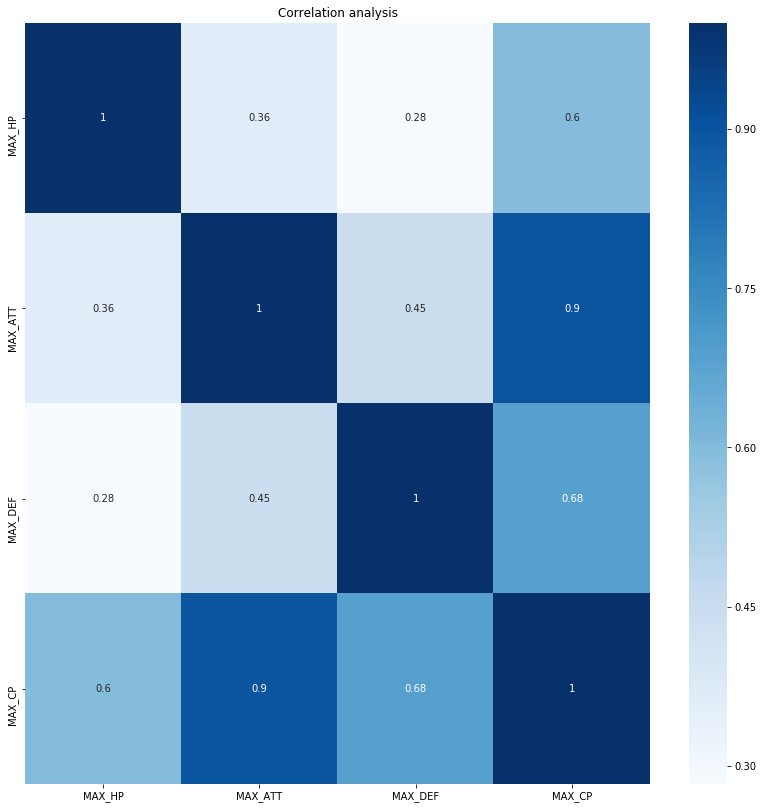

In [87]:
'''
Analyze whether independant variables should be eliminated. For example, if they have reduced
variability or if they are too correlated with each other. 
'''

import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[14, 14])
corr_mtx = XY.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

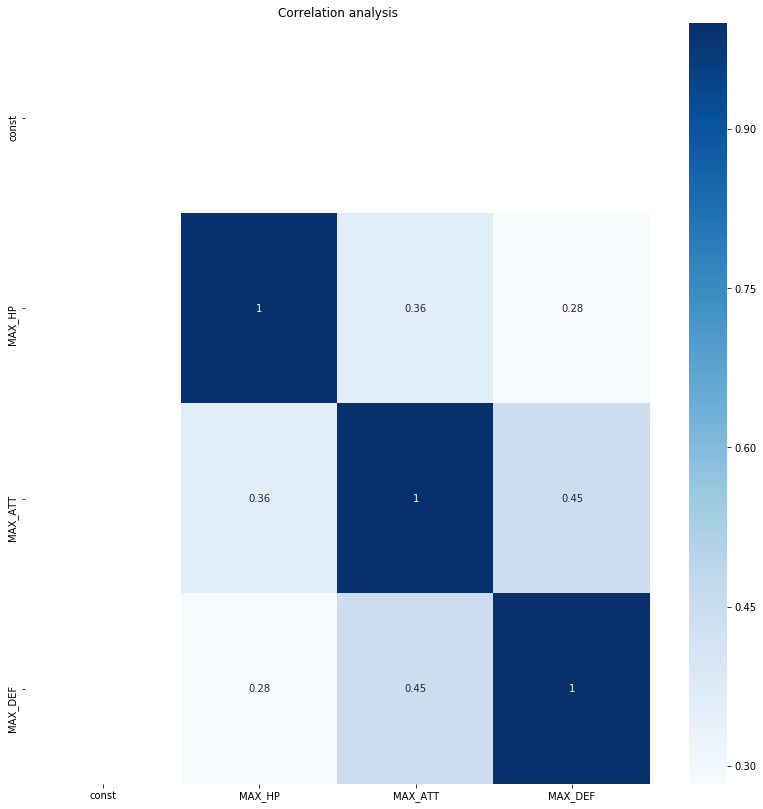

In [89]:
fig = plt.figure(figsize=[14, 14])
corr_mtx = X.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

In [103]:
XY2 = df[['NAME_ENGLISH','MAX_HP','MAX_ATT','MAX_CP']]
XY3=XY2.dropna()
Y1 = XY3[['MAX_CP']]
X1 = XY3[['MAX_HP','MAX_ATT']]
X1

,MAX_HP,MAX_ATT
0,128.0,118.0
1,155.0,151.0
2,190.0,198.0
3,118.0,116.0
4,151.0,158.0
5,186.0,223.0
6,127.0,94.0
7,153.0,126.0
8,188.0,171.0
9,128.0,55.0


In [104]:
regression = LinearRegression()
model2 = regression.fit(X1, Y1)

In [107]:
model2.intercept_

array([-968.71701501])

In [109]:
model2.coef_

array([[ 5.39990268, 12.40671649]])

In [115]:
model2.score(X1,Y1)

0.8875567207784263

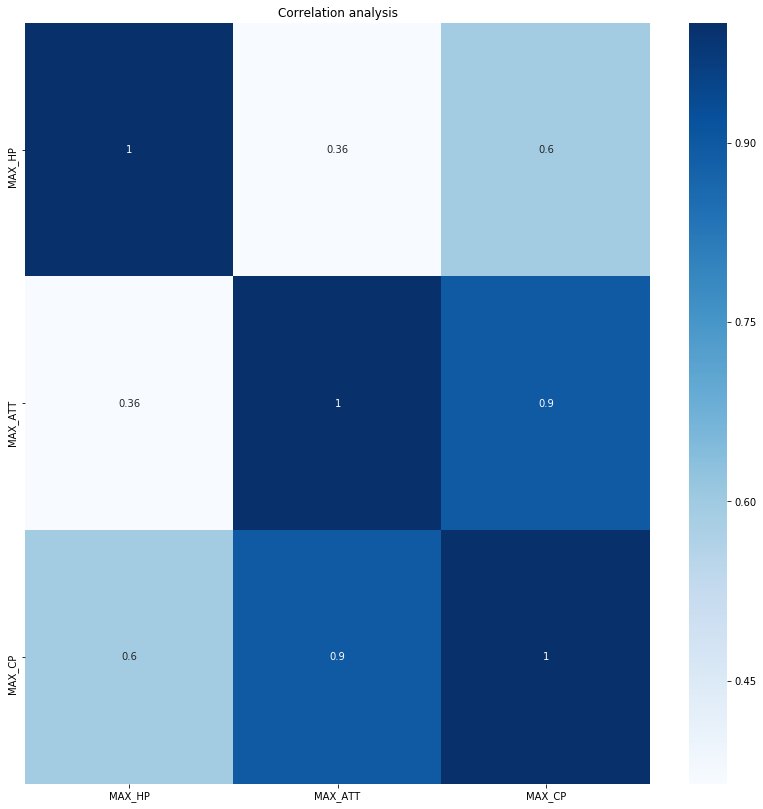

In [105]:
fig = plt.figure(figsize=[14, 14])
corr_mtx = XY3.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

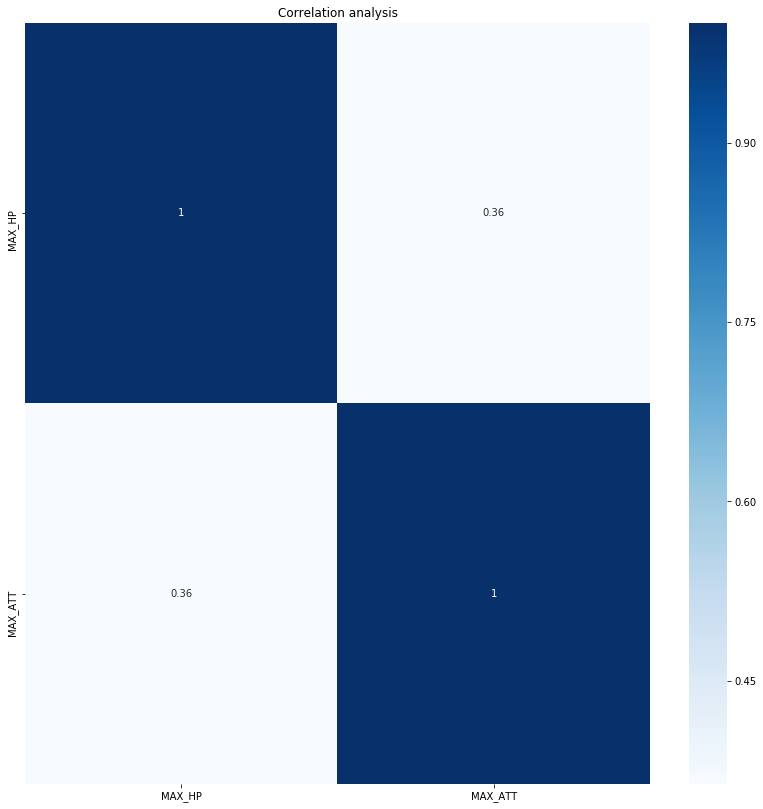

In [106]:
fig = plt.figure(figsize=[14, 14])
corr_mtx = X1.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()